In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("data/processed/full_county_dataset.csv")

In [3]:
chem_cancer = data.filter(regex='^chem|recent_trend').drop(columns='chem_companies').dropna()

Since this is a dummified dataset, let's try a few models first.

# Model: Preprocessing

In [4]:
X = chem_cancer.copy()
y = X.pop('recent_trend_cat')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022, stratify=y)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

# Baseline

In [5]:
y_test.eq(y_train.mode()[0]).mean()

0.7966573816155988

# Model 1: Logistic Regression

In [6]:
log = LogisticRegression(solver='liblinear', penalty='l1', C=0.01, max_iter=100)
log.fit(Z_train, y_train);

In [7]:
print("Train accuracy =", log.score(Z_train, y_train))
print("Test accuracy  =", log.score(Z_test, y_test))

Train accuracy = 0.797585886722377
Test accuracy  = 0.7966573816155988


# Model 2: Random Forest

In [8]:
rf = RandomForestClassifier(max_depth=1, n_estimators=300, n_jobs=-1)
rf.fit(X_train, y_train);

In [9]:
print("Train accuracy =", rf.score(X_train, y_train))
print("Test accuracy  =", rf.score(X_test, y_test))

Train accuracy = 0.797585886722377
Test accuracy  = 0.7966573816155988


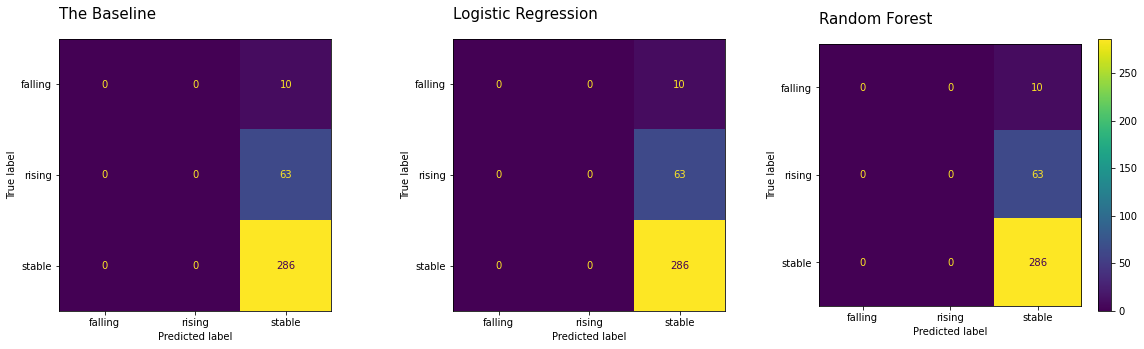

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

ConfusionMatrixDisplay.from_predictions(y_test, pd.Series(y_train.mode()[0], index=y_test.index), ax=axs[0], colorbar=False)
axs[0].set_title("The Baseline", fontsize=15, pad=20, loc='left')

ConfusionMatrixDisplay.from_estimator(log, Z_test, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Logistic Regression", fontsize=15, pad=20, loc='left')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axs[2])
axs[2].set_title("Random Forest", fontsize=15, pad=20, loc='left')

fig.savefig('images/chem_cm.png', transparent=True, bbox_inches="tight");

In [11]:
pd.Series(rf.feature_importances_, index=rf.feature_names_in_).sort_values(ascending=False).pipe(lambda x: x[x>0.001])

chem_Tungsten oxide (WO3)                                                                   0.013333
chem_Distillates (petroleum), hydrotreated light                                            0.013333
chem_Corn, steep liquor                                                                     0.013333
chem_Soybean oil, Me ester                                                                  0.010000
chem_Diphosphonic acid, P,P'-bis(1-methylethenyl)-, homopolymer, hydrolyzed, sodium salt    0.010000
                                                                                              ...   
chem_Starch, phosphate                                                                      0.003333
chem_Cyclotrisiloxane, 2,4,6-triethenyl-2,4,6-trimethyl-                                    0.003333
chem_Benzene, 1-isocyanato-4-(trifluoromethoxy)-                                            0.003333
chem_Benzenesulfonic acid, 2-methyl-5-nitro-                                               